In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Deep Learning

#### Extend Multilayer Perceptron to a much larger number of hidden layers to learn higher order features

* Solutions to the Vanishing Gradient Problem

* Deep Belief Networks (Hinton,2006,2009)
    - Train layers greedily with Contrastive Deviance then use Backprop

* ReLUs replace sigmoid function for hidden layer activation
    - Reduces Vanishing Gradient problem
    
* Long Short Term Memory (Hochreiter and Schmidhuber, 1997)

#### Representation Learning

* Learn the features rather than manual engineering them

* AlexNet (Krizhevshy,Sutskever, Hinton)
    - Convolutional Neural Network that won ImageNet competition in 2012

![](DeepLearning.png)
$$\text{Figure 1. Deep Learning as Representation Learning, Source: Deep Learning Ian Goodfellow, et. al.}$$

## Deep Learning Network

* Convolutional Neural Nets
    - Vision
* Recurrent Neural Nets
    - Sequence learning
    - Long Short Term Memory (LSTM)
    - Gated Recurrent Units (GRU)
* Residual Neural Networks
    - Residual connections are connections that skip layers
* Autoencoders
    - Unsupervised (semi-supervised)
        - reproduces the input
    - Recommender Systems
    - Dimension Reduction    
* Generative Adversarial Networks (GANs)
    - Realistic image generation
* Deep Reinforcement Learning
    - Learns to play Atari games
    - AlphaGo
* Attention and Transformers
    - Natural Language Processing
        - BERT, GPT-3


### Artificial Neural Network ( 1-2  hidden layers)

![](ANN.png)
$$\text{Figure 2 Artifical Neural Network}$$

### Deep Network (Many hidden layes)
![](DeepNN.png)
$$\text{Figure 3. Deep Neural Network}$$


#### Forward Pass : Moving forward from input layer to output layer (Function composition)
    
* Input layer
    - m features, ${x_i, i = 1,...,m}$
    - One input node per feature
* Hidden Layer(s)
    - Each node has parameters (e.g. weights and bias) for each input 
    - Each layer transforms via an activation function f the weighted sum of its input $a_i = f(\sum x_iw_i + b_i)$
    - Width of layer is number of nodes in layer
    - Depth of network is number of layers
    - Layers can have different activation functions
* Output Layer
    - Final transformation to target outcome
    
* Activation Functions
    - ReLU
        - $ ReLU = max(0,z)$ 
        - Hidden Layers
    - Leaky ReLU
        - $ LeakyReLU =  a*z \text{ if } z < 0 \text{ else } z$
        - Hidden Layers
    - Sigmoid (aka logistic)
        - Range(0,1)
        - $\sigma(z) = \frac{1}{1 + e^{-z}}$
        - Output layer Binary Classification
    - Softmax
        - $ Softmax(z)_j =S(z)_j = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}} $
        - Output layer Multinomial Classification
    - Tanh
        - Range (-1,+1)
        - $ tanh(z) = \frac{sinh(z)}{cosh(z)} =  \frac{2}{1 + e^{-2z}} - 1$
        - Long Short Term Memory



#### Loss Function (aka Cost Function, Error Function)
* Compare output with label, difference is the amount of error
* Squared Loss (regression)
* Log loss (binary classification)
* Cross-entropy loss (multinomial classification)
        

#### Backward Pass
* Back propagation: 
    -Propagate the error backwards through the network
* Calculates the gradients
    - The partial derivatives of the parameters wrt the Loss function
* Autograd: Automatic Differentiation
    - Builds Dynamic Graph 

#### Optimization
* Updates the weights and bias
* Stochastic Gradient Descent (SGD)
* SGD with Momentum
* RMSProp
* ADAM
* Others
    - ADAM variations
    - ADAgrad
    - ADAdelta
   
#### Learning Rate Decay
* Gradually reduce learning rate parameter to converge to minimum faster and in a smaller area around the minimum



### Backpropagation and Gradient Descent 

* Calculate the Loss (i.e. Error, Cost) at the end of the forward pass and then propagate the error backwards though the layers to the input.

* Changing (i.e. updating) the weights is the only way to affect the loss. We use gradient descent to update the weights in neural networks.

* Gradient descent: Minimize the loss function by iteratively moving in the direction of the negative of the gradient. $\alpha$ is the learning rate.


$$ \theta_{t + 1} = \theta_t - \alpha \frac{\partial{L}}{\partial{\theta_t}}$$

* Training the network: Repeat propagating the error backwards and adjusting the weights until the loss is within some tolerance.

* Three type of Gradient Descent
    - **Batch** - Update all trials (observations) each epoch (i.e. one pass through the data)
    - **Stochastic** - Randomizes the order of the data and select one observation to update each epoch
    - **Mini Batch** - Choose a batch (e.g.64,128,512) observations to update each epoch

## Optimizers

https://pytorch.org/docs/stable/optim.html

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

#### Exponentially Weighted Averages

$$v_t = \beta*v_{t-1} + (1-\beta)*\theta_t$$

beta = .9 averages over last 10 iterations  
beta = .5 averages last 2 iterations

In [2]:
def ewa(theta,beta = 0.9):
    v = np.zeros(len(theta))
    for t in range(len(theta)):
        if t ==0:
            v[t] = (1-beta)*y[t]
        else:
            v[t] = beta*v[t-1] + (1-beta)*theta[t]
    return v
        

In [3]:
df = pd.read_csv('Smarket.csv')
y = df.Volume.values
x=np.linspace(0,len(y),len(y))
x.shape,y.shape

((1250,), (1250,))

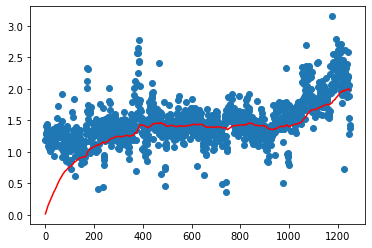

In [6]:
avg = ewa(y,beta=0.99)# try .99 .5
plt.plot(x,y,'o')
plt.plot(x,avg,'r');

### Stochastic Gradient Descent with Momentum

![](Momentum.png)
$$\text{Figure 4. SGD with Momentum Source: Andrew Ng}$$

* Smooth out the movement towards the minimum

Let $\theta$ be a vector of the parameters. 

* On each iteration t:  
    - Compute the gradient of the Loss function wrt to the parameters
$$\nabla_{\theta}L $$
    - The exponential weighted average of the gradient
$$V = \beta*V + (1-\beta)*\nabla_{\theta}L$$
    - Update the parameters
$$\theta = \theta - \alpha*V$$
    
#### Hyperparameters
* $\beta$ = 0.9 (default)
* $\alpha$ the learning rate.  

### RMSprop

* Move slower in the directions of greater slope and faster in the directions of flatter slopes

Let $\theta$ be a vector of the parameters. 

* On each iteration t:  
    - Compute the gradient of the Loss function wrt to the parameters
$$\nabla_{\theta}L $$ 
    - Exponential weighted average of the gradient squared
$$S = \beta*S + (1-\beta)*\nabla_{\theta}^2L$$  
    - Update the parameters
$$\theta = \theta - \alpha*\frac{\nabla_{\theta}}{\sqrt{S + \epsilon}}$$

### Adam

* Combine momentum with RMSprop

Let $\theta$ be a vector of the parameters. 

* On each iteration t:  
    - Compute the gradient of the Loss function wrt to the parameters
$$\nabla_{\theta}L $$ 
    - Momentum
$$V = \beta_1*V + (1-\beta_1)*\nabla_{\theta}L$$
    - RMSprop
$$S = \beta_2*S + (1-\beta_2)*\nabla_{\theta}^2L$$ 
    - Apply bias correction
$$V^c = V/(1 - \beta_1^t) \\
  S^c = S/(1 - \beta_2^t)$$
    
    - Update the parameters
$$\theta = \theta - \alpha*\frac{V^c}{\sqrt{S^c + \epsilon}}$$

#### Hyperparameters

* $\alpha$: Tune
* $\beta_1$: 0.9
* $\beta_2$: 0.999
* $\epsilon: 1x10^{-8}$


### Learning Rate Decay

* Let NumEpoch = current epoch and $\alpha_0$ be the initial Learning Rate hyperparameter

$$\alpha = \frac{1}{1 + \gamma*NumEpoch}*\alpha_0$$

$\gamma$ is the Decay Rate hyperparameter

* Exponential Rate Decay

$$\alpha = \gamma^{NumEpoch}*\alpha_0 \text{ where } \gamma \lt 1$$



### Autograd

 
* For every epoch (i.e. a pass of the data through the model), autograd builds a dynamic graph on the fly from which it can immediately backpropagate gradients.

https://www.youtube.com/watch?v=MswxJw-8PvE

### References

https://ruder.io/optimizing-gradient-descent/index.html#adagrad

### Appendix

https://www.youtube.com/watch?v=wG_nF1awSSY&ab_channel=CarlosLaraAICarlosLaraAI